<a href="https://colab.research.google.com/github/cruz-marco/dex_files/blob/main/Exercicio2_reg_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Obs: faça uma cópia deste colab para sua resolução

# 2 - Regressao Linear Categórica

O dataset de hoje é o [Price Car](https://github.com/rmadan16/LinearRegression_CarPrice). Um dataset disponibilizado por [Rohit Madan](https://medium.com/@madanflies/linear-regression-on-carprice-dataset-or-encoding-a-categorical-dataset-in-linear-regression-7378f207e5c1). Para importar ele, basta utilizar o link: https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv' ou baixar o csv e fazer o upload no colab.

Ele contém a informação sobre a venda de carros usados e informações do carro como:
- Nome do carro
- Tipo de Combustível
- Número de portas
- Comprimento / Largura / Altura
- Outros variáveis
- Preço de venda

Nesse exercício você deverá aplicar o conceito de transformação categórica na coluna de **carbody** e desenvolver um modelo de Regressão Linear e avaliar seu desempenho.

## 2 - 0 Importação da bibliotecas

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 2 - 1 Criação do DataFrame filtragem da coluna [carbody, price]

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [102]:
valores_unicos = list()
for coluna in tuple(df.columns):  
  valores_unicos.append((coluna, len(df[coluna].unique()), tuple(df[coluna].unique())))

print(*sorted(valores_unicos, key=lambda x: x[1]), sep='\n')

('fueltype', 2, ('gas', 'diesel'))
('aspiration', 2, ('std', 'turbo'))
('doornumber', 2, ('two', 'four'))
('enginelocation', 2, ('front', 'rear'))
('drivewheel', 3, ('rwd', 'fwd', '4wd'))
('carbody', 5, ('convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'))
('symboling', 6, (3, 1, 2, 0, -1, -2))
('enginetype', 7, ('dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'))
('cylindernumber', 7, ('four', 'six', 'five', 'three', 'twelve', 'two', 'eight'))
('fuelsystem', 8, ('mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'))
('peakrpm', 23, (5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200, 4350, 4500, 5200, 4150, 5600, 5900, 5750, 5250, 4900, 4400, 6600, 5300))
('citympg', 29, (21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25, 13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33))
('highwaympg', 30, (27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33, 31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46))
('compressionratio', 32, (9.0,

In [103]:
dfReduce = df['carbody price'.split()][:]

In [104]:
dfReduce.head()

,carbody,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0


In [105]:
dfReduce.describe(percentiles=[0.05, 0.1, 0.15, 0.25, 0.45, 0.5, 0.65, 0.75, 0.90, 0.99])

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
5%,6197.000000
10%,6657.000000
15%,6968.600000
25%,7788.000000
45%,9621.000000
50%,10295.000000


## 2 - 2 Distribuição do preço de acordo com o carbody

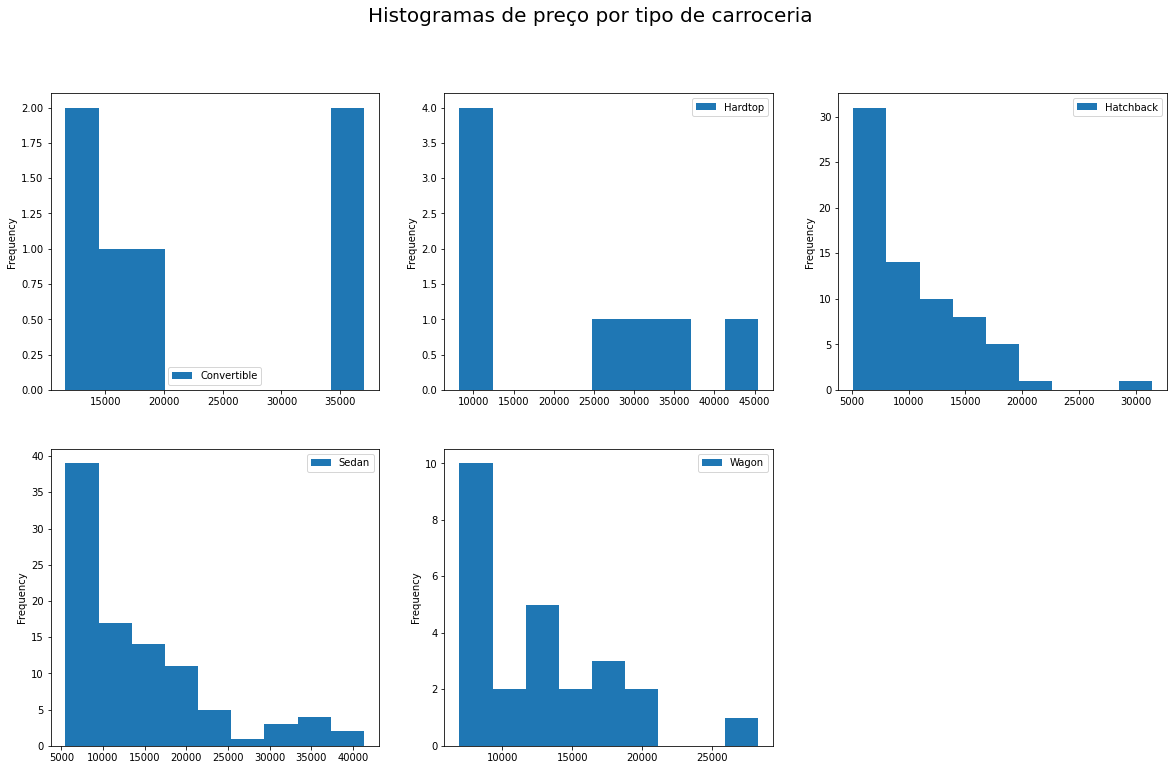

In [106]:
car_bodies = sorted(tuple(dfReduce['carbody'].unique()))[::-1]
bod_index = len(car_bodies) - 1 

ncols = 3
nrows = int(np.ceil(len(car_bodies)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 12))

fig.suptitle('Histogramas de preço por tipo de carroceria', fontsize=20)

for lines in axes: #itera nas linhas
  for cols in lines: #itera nas colunas dentro das linhas
    if bod_index >= 0:  #verifica o indice a ser usado

      linha = np.where(axes == lines)[0][0] #pega o index da linha
      coluna = np.where(lines == cols)[0][0] #pega o index da coluna

      dfReduce[dfReduce['carbody'] == car_bodies[bod_index]]['price'].plot.hist(
      bins=9, label=car_bodies[bod_index].replace('_', ' ').title(), 
      subplots=True, legend=True, ax=axes[linha, coluna])

      
      bod_index -= 1

    else:
      plt.axis('off')

plt.show()


## 2 - 3 Transformações da variável categórica 

### Usando o get_dummies do pandas

In [107]:
dfReduce = pd.concat([pd.get_dummies(dfReduce['carbody'], prefix='cb', prefix_sep='_', drop_first=False), dfReduce], axis=1).drop('carbody', axis=1)

## 2 - 4 Treinamento e validação do modelo

### Separar Treino X Teste

In [108]:
y = dfReduce['price']
X = dfReduce.drop('price', axis=1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 46 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cb_convertible  164 non-null    uint8
 1   cb_hardtop      164 non-null    uint8
 2   cb_hatchback    164 non-null    uint8
 3   cb_sedan        164 non-null    uint8
 4   cb_wagon        164 non-null    uint8
dtypes: uint8(5)
memory usage: 2.1 KB


### Treinar modelo

In [111]:
reg = LinearRegression().fit(X_train, y_train)

In [112]:
reg.coef_

array([ 5713.59037976,  4557.37609405, -5437.04056667, -2167.0162869 ,
       -2666.90962024])

### Calcular métricas do modelo

- Fórmula da regressão
- MSE
- RMSE
- R²

In [113]:
residuals = pd.DataFrame()
residuals['real'] = y_test
residuals['predict'] = reg.predict(X_test)
residuals['residual'] = residuals['real'] - residuals['predict']

residuals.head()

,real,predict,residual
154,7898.0,13510.000000,-5612.000000
21,5572.0,10739.869054,-5167.869054
198,18420.0,14009.893333,4410.106667
48,35550.0,14009.893333,21540.106667
34,7129.0,10739.869054,-3610.869054


In [114]:
r2 = r2_score(residuals['real'], residuals['predict'])
mse = mean_squared_error(residuals['real'], residuals['predict'])
rmse = np.sqrt(mse)

print(f'R_sq: {r2}\nMSE: {mse}\nRMSE: {rmse}')

R_sq: 0.1730602138756645
MSE: 56492052.330627024
RMSE: 7516.119499490879


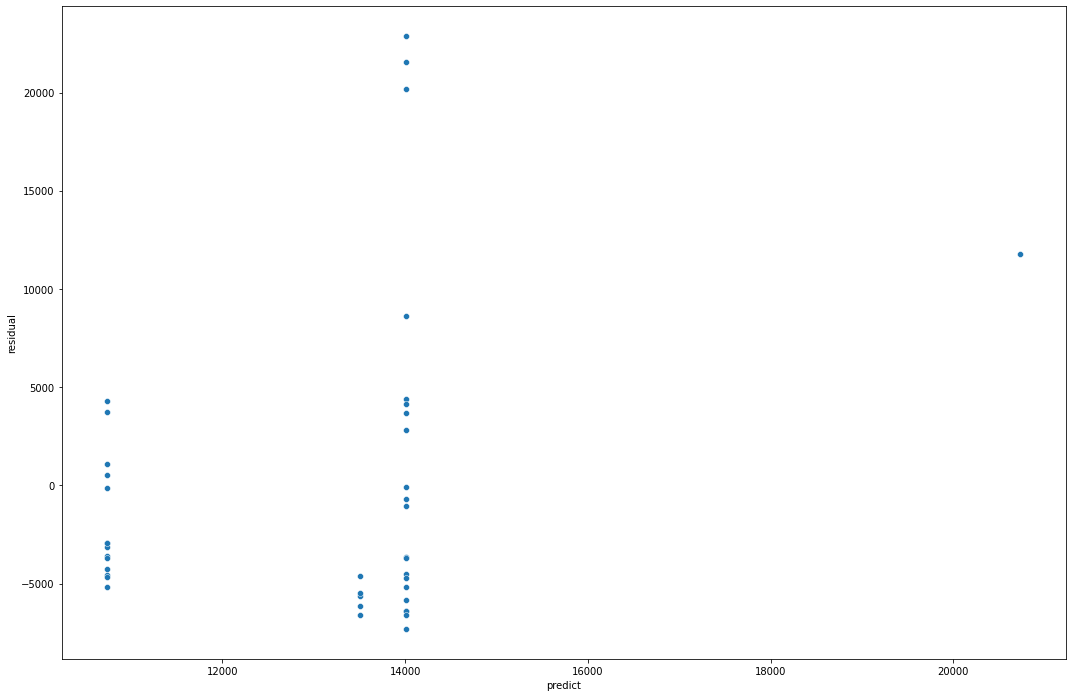

In [115]:
fig = plt.figure(figsize=(18,12))

sns.scatterplot(x=residuals['predict'], y=residuals['residual'])

plt.show()